## **Trabalho Final**

1 - Ler o artigo https://arxiv.org/abs/2108.02497 (utilize tradutor caso não seja confortável com inglês) *(Artigo: How to avoid machine learning pitfalls:
a guide for academic researchers from Michael A. Lones∗)*

2 - Para cada item do artigo faça um pequeno resumo conforme seu entendimento (minímo de 100 palavras por item)

3 - Para os itens 2 a 5 inclua um pequeno comentário (pode ser trecho de código, ou referencia a algum objeto/técnica/método) estudado em aula que esteja relacionado ao tópico. 

3.1 - Exemplo: no item 4.1 pode-se citar o holdout como técnica de split ou o objeto "train_test_split¨, esse objeto garante o uso apropriado de um conjunto de teste por que.... (continuar)

4 - Faça todo resumo e comentários acima em um arquivo colab, usando linguagem markdown

5 - Compartilhar o link (no colab, botão superior direito, compartilhar, alterar opção para "qualquer um com link pode visualizar", copiar link, e colar o link aqui para verificação)


## **1 Introduction**

*This guide aims to help newcomers avoid some of the mistakes that can occur when
using machine learning (ML) within an academic research context. It’s written by an academic, and focuses on lessons that were learnt whilst doing ML research in academia, and whilst supervising students doing ML research. It is primarily aimed at students and other researchers who are relatively new to the field of ML, and only assumes a basic knowledge of ML techniques. Unlike similar guides aimed at a more general ML audience, it reflects the scholarly concerns of academia: such as the need to rigorously evaluate and compare models in order to get work published. However, most of the lessons are applicable to the broader use of ML, and it could be used as an introductory
guide to anyone getting started in this field. To make it more readable, the guidance is written informally, in a Dos and Don’ts style. It’s not intended to be exhaustive, and references are provided for further reading. Since it doesn’t cover issues specific to particular academic subjects, it’s recommended that you also consult subject-specific guidance where available (e.g. for medicine [Luo et al., 2016, Stevens et al., 2020]).
Feedback is welcome, and it is expected that this document will evolve over time. For this reason, if you cite it, please include the arXiv version number.*


---


Este guia, em um contexto de pesquisa acadêmica, busca auxiliar os novatos a evitar alguns dos erros que podem ser cometidos quando se usando aprendizado de máquinas (Machine Learning). É destinado principalmente a estudantes e outros investigadores que possuem domínio no assunto relativamente novo, e apenas pressupõe um conhecimento básico das técnicas de ML. Este guia reflete as preocupações da academia, como a necessidade de avaliar e comparar modelos rigorosamente a fim de se publicar trabalhos, todavia, a maioria das lições são  aplicáveis ao uso de ML e podem ser utilizadas como uma introdução a quem é iniciante no assunto. A fim de facilitar, a orientação é escrita informalmente, no estilo do que se deve ou não se deve fazer.

## **2 Before you start to build models** 

*It’s normal to want to rush into training and evaluating models, but it’s important to take the time to think about the goals of a project, to fully understand the data that will be used to support these goals, to consider any limitations of the data that need to be addressed, and to understand what’s already been done in your field. If you don’t do these things, then you may end up with results that are hard to publish, or models that are not appropriate for their intended purpose.*


---


É normal quereros nos apressar em treinar e avaliar modelos, todavia, é ainda mas é importante reservar um tempo para refletir sobre os objetivos de um projeto, para entender completamente os dados que serão utilizados para apoiar esses objetivos, para considerar quaisquer limitações dos dados que se precisa para se abordar e entender o que já foi feito em sua área. Se essas coisas não forem feitas, então é possivel que acabemos com resultados que são difíceis de publicar, ou modelos que não são apropriados para a finalidade pretendida.


**2.1 Do take the time to understand your data**

*Eventually you will want to publish your work. This is a lot easier to do if your data is from a reliable source, has been collected using a reliable methodology, and is of good quality. For instance, if you are using data collected from an internet resource, make sure you know where it came from. Is it described in a paper? If so, take a look at the paper; make sure it was published somewhere reputable, and check whether the authors mention any limitations of the data. Do not assume that, because a data set has been
used by a number of papers, it is of good quality — sometimes data is used just because it is easy to get hold of, and some widely used data sets are known to have significant limitations (see [Paullada et al., 2020] for a discussion of this). If you train your model using bad data, then you will most likely generate a bad model: a process known as garbage in garbage out. So, always begin by making sure your data makes sense. Do some exploratory data analysis (see Cox [2017] for suggestions). Look for missing or inconsistent records. It is much easier to do this now, before you train a model, rather than later, when you’re trying to explain to reviewers why you used bad data.*


---


Eventualmente, as pessoas desejarão publicar seu trabalho, isso é muito mais fácil de fazer se os dados forem de uma fonte confiável, se eles tiverem sido coletados utilizando-se uma metodologia confiável e que seja de boa qualidade. Por exemplo, se você estiver utilizando dados coletados de um recurso da Internet, é necessário certificar-se de saber de onde eles vieram, se a fonte é confiavel, como um artigo, ou jornal, então deve-se pesquisar e ver se eles foram publicados em um lugar confiável, se os autores mencionaram alguma limitação de dado ou não. Não se pode supor que apenas porque um  conjunto de dados foi usado por uma série de documentos, eles são de boa qualidade, às vezes eles são utilizados ​​apenas porque são  de fácil obtenção, e alguns conjuntos de dados amplamente usados ​​são conhecidos por terem limitações significativas. Se o modelo for treinado utilizando-se dados incorretos, a probabilidade de se gerar um modelo incorreto é demasiadamente grande, portanto, a necessidade de se verificar os dados e suas fontes é imprescindível. É aconselhável fazer algumas análises exploratórias de dados, procurar por registros ausentes ou inconsistentes. É muito mais fácil fazer isso antes de treinar um modelo, do que mais tarde,  tentando se explicar aos revisores por foram usado dados incorretos.


Em aula, aprendemos como fazer essa análise e verificação dos dados, **alguns exemplos** podem ser visto a seguir: 


*   df**.isnull().sum()** #Mostra os valores ausentes por coluna
*   array**.dtype** #Atributo dtype identifica o tipo de dado que estará contido em um objeto
*   array**.size** #Atributo size retorna o numero de elementos em um array
*   array.shape #Atributo shape retorna o número de elementos ao longo de cada dimensão da matriz


**2.2 Don’t look at all your data**

*As you look at data, it is quite likely that you will spot patterns and make insights that guide your modelling. This is another good reason to look at data. However, it is important that you do not make untestable assumptions that will later feed into your model. The “untestable” bit is important here; it’s fine to make assumptions, but these should only feed into the training of the model, not the testing. So, to ensure this is the case, you should avoid looking closely at any test data in the initial exploratory analysis stage. Otherwise you might, consciously or unconsciously, make assumptions that limit
the generality of your model in an untestable way. This is a theme I will return to several times, since the leakage of information from the test set into the training process is a common reason why ML models fail to generalise. See Don’t allow test data to leak into the training process for more on this.*


---


Ao se observar os dados, é bem provável a identificação de padrões e geração de percepções que guiem a modelagem, o que é outro bom motivo para que os dados sejam examinados. Todavia, é importante que não sejam feitas suposições não testáveis que posteriormente serão inseridas no modelo. A parte “não testável” quer dizer que, não há problema em fazer suposições, mas elas devem apenas alimentar o treinamento do modelo, não o teste. Portanto, para a garantia de que esse seja o caso, deve-se evitar olhar atentamente para quaisquer dados de teste no estágio inicial de análise exploratória, caso contrário,  pode-se acabar, consciente ou inconscientemente, fazendo suposições que limitam a generalidade do modelo de uma forma não testável. Esse é um tema importante pois o vazamento de informações do conjunto de testes para o processo de treinamento é um motivo comum para a falha na generalização dos modelos de Machine Learning. 

Algumas formas de se analisar os dados vistos nas aulas foi através da plotagem de gráficos. Como por exemplo a biblioteca mlxtend, com ela podemos gerar um gráfico do tipo **scatterplotmatrix**, que plota na figura todos os valores da matriz x onde y é igual ao numero dado.

from mlxtend.plotting import scatterplotmatrix


**2.3 Do make sure you have enough data**

*If you don’t have enough data, then it may not be possible to train a model that generalises. Working out whether this is the case can be challenging, and may not be evident until you start building models: it all depends on the signal to noise ratio in the data set.*

*If the signal is strong, then you can get away with less data; if it’s weak, then you need more data. If you can’t get more data — and this is a common issue in many research fields — then you can make better use of existing data by using cross-validation (see Do evaluate a model multiple times). You can also use data augmentation techniques (e.g. see [Wong et al., 2016, Shorten and Khoshgoftaar, 2019]), and these can be quite effective for boosting small data sets. Data augmentation is also useful in situations where you have limited data in certain parts of your data set, e.g. in classification problems where you have less samples in some classes than others — a situation known as class imbalance (see Haixiang et al. [2017] for a review of methods for dealing with this; also see Don’t use accuracy with imbalanced data sets). However, if you have limited data, then it’s likely that you will also have to limit the complexity of the ML models you use, since models with many parameters, like deep neural networks, can easily overfit small data sets. Either way, it’s important to identify this issue early on, and come up with a suitable (and defensible) strategy to mitigate it.*


---


Pode-se não ser possível treinar um modelo que generalize, se não tiver dados suficientes. Descobrir-se se esse é ou não, o caso, pode não ser evidente até que se comece a construir modelos, tudo depende da relação sinal-ruído no conjunto de dados.
Se o sinal for forte, é possivel não se ter roblemas por ter menos dados mas se o sinal estiver fraco, mais dados são necessários. Se não for possível a obtenção de mais dados (o que é um problema comum em muitos campos de pesquisa) uma possivel solução é fazer melhor uso dos dados existentes usando validação cruzada. Também pode-se usar técnicas de aumento de dados, que podem ser bastante eficazes para impulsionar pequenos conjuntos de dados. O aumento de dados também é útil em situações em que se tem dados limitados em certas partes do conjunto de dados, por exemplo, em problemas de classificação onde se tem menos amostras em algumas classes do que outras (situação conhecida como desequilíbrio de classe). No entanto, se os dados forem limitados, é provável que também tenha-se que limitar a complexidade dos modelos de ML que usa, pois modelos com muitos parâmetros, como redes neurais profundas, podem facilmente ajustar-se a pequenos conjuntos de dados. De qualquer forma, é importante identificar esse problema no início e chegar a uma estratégia adequada (e defensável) para mitigá-lo.


**2.4 Do talk to domain experts**

*Domain experts can be very valuable. They can help you to understand which problems are useful to solve, they can help you choose the most appropriate feature set and ML model to use, and they can help you publish to the most appropriate audience. Failing to consider the opinion of domain experts can lead to projects which don’t solve useful problems, or which solve useful problems in inappropriate ways. An example of the latter is using an opaque ML model to solve a problem where there is a strong need to understand how the model reaches an outcome, e.g. in making medical or financial decisions (see [Rudin, 2019]). At the beginning of a project, domain experts can help you
to understand the data, and point you towards features that are likely to be predictive.*

*At the end of a project, they can help you to publish in domain-specific journals, and hence reach an audience that is most likely to benefit from your research.*


---


Os especialistas em domínio podem ser muito valiosos podem ajudar a entender 
quais problemas  são úteis para resolver, também podem ajudar a escolher o conjunto de recursos e o modelo de ML mais adequado a ser utilizado, podem auxiliar a publicar o projeto para o público mais adequado.Desconsiderar a opinião de especialistas de domínio pode levar a projetos que não resolvem problemas, ou que resolvem problemas úteis de maneiras inadequadas. Um exemplo dado do último é :  Um modelo de ML opaco utilizado para a resolução de um problema em que há uma forte necessidade de entender como o modelo chega a um resultado, por exemplo, na tomada de decisões médicas ou financeiras. Sendo assim, no início de um projeto, o auxilio de especialistas de domínio podem ajudar a entender os dados e apontar para os recursos que provavelmente serão preditivos e quando finalizado o projeto, eles podem ajudar a publicar em  periódicos específicos do domínio e, portanto, atingir um público que provavelmente se beneficiará com a pesquisa.


Em aula foram passados inúmeros métodos e classificadores e mostrada a diferença entre eles e qual seria melhor para que, um exemplo, seria em relação as distâncias métricas, como elas diferem e qual seria a mais apropriada para determinado problema, comparando-as entre si como pode-se ver na imagem abaixo:


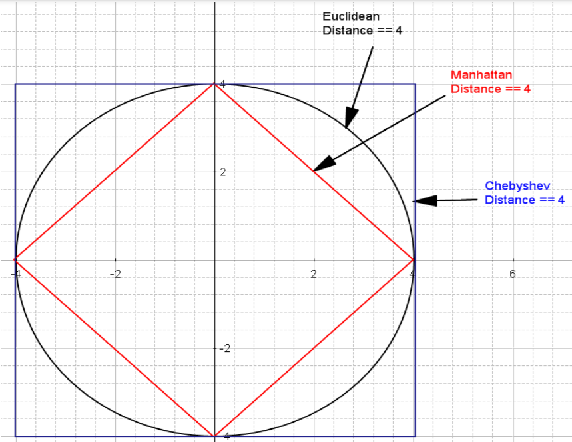

ou então a questão abordada na aula sobre o classificador naive bayes,que é umpotente modelo de predição, mas falha quando se ve nessa situação(video passado: https://www.youtube.com/watch?v=feBKiAdhYkc&ab_channel=VictorLavrenko)


**2.5 Do survey the literature**

*You’re probably not the first person to throw ML at a particular problem domain, so it’s important to understand what has and hasn’t been done reviously. Other people having worked on the same problem isn’t a bad thing; academic progress is typically an iterative process, with each study providing information that can guide the next. It may be discouraging to find that someone has already explored your great idea, but they most likely left plenty of avenues of investigation still open, and their previous work can be used as justification for your work. To ignore previous studies is to potentially miss out on valuable information. For example, someone may have tried your proposed approach before and found fundamental reasons why it won’t work (and therefore saved you a few years of frustration), or they may have partially solved the problem in a way that you can build on. So, it’s important to do a literature review before you start work; leaving it too late may mean that you are left scrambling to explain why you are covering the same ground or not building on existing knowledge when you come to write a paper.*

---


É importante entender o que foi e o que não foi feito recentemente em um domínio de problema específico, antes de se lançar o ML . Não é uma coisa ruim ter outras pessoas que ja trabalharam no mesmo problema que se esta tentando resolver, ou que a ideia que se teve, não é nova, já foi explorada, abre a oportunidade de se utilizar esses trabalhos anteriores como justificativa para seu proprio trabalho. Ignorar estudos anteriores é potencialmente perder informações valiosas. Por exemplo, alguém pode ter tentado sua abordagem proposta antes e encontrado razões fundamentais pelas quais ela não funcionaria (e, portanto, salvou pessoas que tiveram essa mesma ideia, de muito tempo perdido e de frustração), ou pode-se ter resolvido parcialmente o problema de uma forma que você pode construir e finalizar. Sendo assim, é importante fazer uma revisão da literatura antes de começar a trabalhar, deixar para depois, pode ocasionar em ter que se explicar posteriormente por que  está sendo coberto o mesmo terreno, ou não se está construindo sobre, o conhecimento já existente, quando começar a escrever um artigo.

Um exemplo disso são as bibliotecas, os métodos e classificadores já prontos que utilizamos, ao invés de os implementá-los do início a cada vez. Também os datasets, ao invés de perdermos tempo criando um conjunto de dados específico que se precisa quando já existe um que seja adequado, ou mesmo como fazemos em aula, que utilizamos um pronto para nosso aprendizado:

*   **from sklearn.datasets import load_breast_cancer** #Carregua e devolva o conjunto de dados de Wisconsin (classificação) do câncer de mama.
*   **from sklearn.neighbors import KNeighborsClassifier** #Classificador que implementa a votação de k-vizinhos mais próximos.
*   resultado = modelo**.score**(x_teste, y_teste) #Método que mede a precisão do modelo em relação aos dados de treinamento.

Entre outros...










**2.6 Do think about how your model will be deployed**

*Why do you want to build an ML model? This is an important question, and the
answer should influence the process you use to develop your model. Many academic
studies are just that — studies — and not really intended to produce models that will be used in the real world. This is fair enough, since the process of building and analysing models can itself give very useful insights into a problem. However, for many academic studies, the eventual goal is to produce an ML model that can be deployed in a real world situation. If this is the case, then it’s worth thinking early on about how it is going to be deployed. For instance, if it’s going to be deployed in a resource-limited environment, such as a sensor or a robot, this may place limitations on the complexity of the model. If there are time constraints, e.g. a classification of a signal is required within milliseconds, then this also needs to be taken into account when selecting a model.*

*Another consideration is how the model is going to be tied into the broader software system within which it is deployed. This procedure is often far from simple (see [Sculley et al., 2015]). However, emerging approaches such as ML Ops aim to address some of the difficulties; see [Tamburri, 2020].*


---

Uma questão importante, é a resposta para o porque se deseja construir um modelo de machine learning, uma vez que ela deve influenciar o processo que se usa para desenvolver seu modelo. Muitos estudos acadêmicos não pretendem realmente produzir modelos que serão usados ​​no mundo real, pois são usados apenas para estudo, mas isso não é um problema, uma vez que o próprio processo de construção e análise de modelos pode fornecer percepções muito úteis sobre um problema. Todavia, para muitos estudos acadêmicos, o objetivo final é produzir um modelo de machine learning que possa ser implantado em uma situação do mundo real. Sendo esse o caso, vale a pena pensar desde o início sobre como ele será implantado. Por exemplo, se for implantado em um ambiente com recursos limitados, como um sensor ou um robô, isso pode colocar limitações na complexidade do modelo. Se houver restrições de tempo, por exemplo, uma classificação de um sinal é necessária em milissegundos, então isso também precisa ser levado em consideração ao selecionar um modelo. Outra consideração seria como o modelo será vinculado ao sistema de software mais amplo no qual é implantado.


Um exemplo, na aula de Decision tress foi abordado sobre o tempo de complexidade desse algoritmo de acordo com o conjunto de dados que se possui, dependendo do ambiente ter recursos limitados, seria necessário avaliar se o modelo seria adequado ou não, se a própria  árvore de decisão é realmente a melhor escolha pra o projeto a ser implantado no mundo real.

##**3 How to reliably build models**
*Building models is one of the more enjoyable parts of ML. With modern ML frameworks, it’s easy to throw all manner of approaches at your data and see what sticks. However, this can lead to a disorganised mess of experiments that’s hard to justify and hard to write up. So, it’s important to approach model building in an organised manner, making sure you use data correctly, and putting adequate consideration into the choice of models.*


---



**3.1 Don’t allow test data to leak into the training process**

*It’s essential to have data that you can use to measure how well your model generalises. A common problem is allowing information about this data to leak into the configuration, training or selection of models. When this happens, the data no longer provides a reliable measure of generality, and this is a common reason why published ML models often fail to generalise to real world data. There are a number of ways that information can leak from a test set. Some of these seem quite innocuous. For instance, during data preparation, using information about the means and ranges of variables within the whole data set to carry out variable scaling — in order to prevent information leakage, this kind of thing should only be done with the training data. Other common examples of information leakage are carrying out feature selection before partitioning the data (see Do be careful where you optimise hyperparameters and select features), and using the same test data to evaluate the generality of multiple models (see Do use a validation set and Don’t always believe results from community benchmarks). The best thing you can do to prevent these issues is to partition off a subset of your data right at the start of your project, and only use this independent test set once to measure the generality of a single model at the end of the project (see Do save some data to evaluate your final model instance). See [Cawley and Talbot, 2010] and [Kaufman et al., 2012] for a broader discussion of this.*


---
É essencial possuir dados que se possa usar para medir o quão bem o modelo é generalizado. Um problema comum é permitir que informações sobre esses dados vazem para a configuração, treinamento ou seleção de modelos, quando isso ocorre, os dados não fornecem mais uma medida confiável de generalidade, e esse é um motivo comum pelo qual os modelos de machine learning publicados muitas vezes não conseguem generalizar para dados do mundo real. Existem várias maneiras pelas quais as informações podem vazar de um conjunto de teste, sendo que alguns deles parecem bastante inócuos. Um exemplo é de que, durante a preparação dos dados, usando informações sobre os meios e intervalos das variáveis ​​dentro de todo o conjunto de dados para realizar o escalonamento das variáveis ​​(a fim de que se evite o vazamento de informações, esse tipo de coisa deve ser feito apenas com os dados de treinamento. Outros exemplos comuns de vazamento de informações são realizar a seleção de recursos antes de particionar os dados e utilizar os mesmos dados de teste para avaliar a generalidade de vários modelos. O melhor que se pode fazer para evitar esses problemas é particionar um subconjunto de seus dados logo no início do seu projeto e usar este conjunto de teste independente apenas uma vez para medir a generalidade de um único modelo no final do projeto.


In [ ]:
#Um exemplo ensinado na aula é a partição dos dados logo no início do projeto, por exemplo: 

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data_cancer = load_breast_cancer()
X = data_cancer.data[:, [2, 3]]
y = data_cancer.target
#Separando base de treinamento e base de teste
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, shuffle=True,random_state=1, stratify=y)


**3.2 Do try out a range of different models**

*Generally speaking, there’s no such thing as a single best ML model. In fact, there’s a proof of this, in the form of the No Free Lunch theorem, which shows that no ML approach is any better than any other when considered over every possible problem [Wolpert, 2002]. So, your job is to find the ML model that works well for your particular problem. There may be some a priori knowledge of this, in the form of good quality research on closely related problems, but most of the time you’re operating in the dark.*

*Fortunately, modern ML libraries in Python (e.g. scikit-learn [Varoquaux et al., 2015]), R (e.g. caret [Kuhn, 2015]), Julia (e.g. MLJ [Blaom et al., 2020]) etc. allow you to try out multiple models with only small changes to your code, so there’s no reason not to try out multiple models and find out for yourself which one works best. In the light of No Free Lunch, it’s important to avoid “not invented here syndrome”, i.e. only using models that have been invented at your own institution, since this may cause you to omit the best model for a particular problem.*


---

De  modo geral, não existe um único modelo de machine leraning que seja o melhor, existe inclusive uma prova disso na forma do teorema No Free Lunch, que mostra que nenhuma abordagem de machine learning é melhor do que qualquer outra quando considerada sobre todos os problemas possíveis, sendo assim, o trabalho de quem esta programando é encontrar o modelo de ML que funcione bem para seu problema específico. Pode haver algum conhecimento a priori sobre isso, na forma de pesquisa de boa qualidade sobre problemas intimamente relacionados, mas na maioria das vezes se está operando no escuro. Muitas bibliotecas modernas de machine learning nos permite experimentar vários modelos com apenas pequenas alterações no código,assim, não há razão para não experimentar vários modelos e descobrir por si mesmo qual deles funciona melhor.

In [ ]:
#Varias bibliotecas de diferentes classificadores que aprendemos e utilizamos em um mesmo conjunto de dados ao longo do semestre
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.tree import DecisionTreeClassifier


**3.3 Don’t use inappropriate models**

*By lowering the barrier to implementation, modern ML libraries also make it easy to apply inappropriate models to your data. Examples of this include applying models that expect categorical features to a data set comprised of numeric features, or attempting to apply a model that assumes no dependencies between variables to time series data. This is particularly something to consider in the light of publication, since reporting results from inappropriate models will give reviewers a bad impression of your work. Another
example is using a model that is unnecessarily complex. For instance, a deep neural network is not a good choice if you have limited data, if domain knowledge suggests the underlying pattern is quite simple, or if the model needs to be interpretable. Finally, don’t use recency as a justification for choosing a model: old, established, models often work better than new ones.*


---
Ao auxliliar e diminuir a o tempo de implementação, as bibliotecas modernas de ML também facilitam a aplicação de modelos inadequados aos dados. Exemplos disso incluem a aplicação de modelos que esperam recursos categóricos a um conjunto de dados composto de recursos numéricos ou a tentativa de aplicar um modelo que não assume dependências entre variáveis para dados de série temporal. Isso é algo ao qual se deve ter cuidado e bastante consideração pois uma vez publicado o projeto, uma vez relatado resultados de modelos inadequados, se dará aos revisores uma má impressão de trabalho. Outro
exemplo é usar um modelo desnecessariamente complexo. Por exemplo, uma rede neural profunda não é uma boa escolha se você tiver dados limitados, se o conhecimento do domínio sugerir que o padrão subjacente é bastante simples ou se o modelo precisa ser interpretável. Por fim, não se deve usar apenas o tempo para retorno como justificativa ao se escolher um modelo, uma vez que modelos antigos, estabelecidos, geralmente funcionam melhor do que os novos.


Um exemplo é o uso de PCA quando não se é necessário, que pode atrapalhar o resultado final. No slide 5 da aula L10_LDA x PCA vemos que ele **ajuda** quando a direção da variação máxima é horizontal, e as classes são separadas
horizontalmente e **atrapalha** quando a direção da variação máxima é
horizontal, mas as classes são separadas verticalmente.

No pdf principal_components.pdf (*A tutorial on Principal Components Analysis,Lindsay I Smith, February 26, 2002*) no item *4.3 PCA for image compression*
,é dado um exmplo do uso do PCA em uma compressão de imagens, em que o resultado final da compressão técnica foi considerado com perdas, porque a imagem descompactada,seu resultado final, não era exatamente o mesmo que o original, era pior.

**3.4 Do optimise your model’s hyperparameters**

*Many models have hyperparameters — that is, numbers or settings that affect the
configuration of the model. Examples include the kernel function used in an SVM, the number of trees in a random forest, and the architecture of a neural network. Many of these hyperparameters significantly effect the performance of the model, and there is generally no one-size-fits-all. That is, they need to be fitted to your particular data set in order to get the most out of the model. Whilst it may be tempting to fiddle around with hyperparameters until you find something that works, this is not likely to be an optimal approach. It’s much better to use some kind of hyperparameter optimisation strategy, and this is much easier to justify when you write it up. Basic strategies include random search and grid search, but these don’t scale well to large numbers of hyperparameters or to models that are expensive to train, so it’s worth using tools that search for optimal configurations in a more intelligent manner (surveyed in [Yang and Shami, 2020]). It is also possible to use AutoML techniques to optimise both the choice of model and its hyperparameters, in addition to other parts of the data mining pipeline — see He et al. [2021] for a review.*


---
Muitos modelos têm hiperparâmetros (números ou configurações) que afetam a configuração do modelo. Alguns exemplos incluem a função kernel usada em um SVM, o número de árvores em uma floresta aleatória e a arquitetura de uma rede neural. Muitos desses hiperparâmetros afetam significativamente o desempenho do modelo e geralmente não há um tamanho único,ou seja, eles precisam ser ajustados ao seu conjunto de dados específico para obter o máximo do modelo. A melhor abordagem para se ajustar os hiperparâmetros, é utilizando algum tipo de estratégia de otimização de hiperparâmetros. As estratégias básicas incluem pesquisa aleatória e pesquisa de grade, mas não escalam bem para um grande número de hiperparâmetros ou para modelos que são caros para treinar, sendo assim, vale a pena usar ferramentas que procuram as configurações ideais de uma maneira mais inteligente, também é possível usar técnicas do AutoML para otimizar a escolha do modelo e seus hiperparâmetros, além de outras partes do pipeline de mineração de dados.


In [ ]:
# Um exemplo ensinado é o Grid search, essa técnica testa todas as combinações possíveis dos hiperparâmetros, exaustivamente.
# obs: parte do código retirado da L11_intro to model selection(prática) que enviei
from sklearn.model_selection import GridSearchCV

param_grid = {
    'reduce_dim__n_components': [1, 2, 3, 4,5,6,7,8,9,10],
    'classify__n_neighbors': [10, 12, 14, 16, 18, 20, 22, 24, 26, 28]
}

grid = GridSearchCV(pipe, cv=2, n_jobs=1, param_grid=param_grid, scoring='accuracy')

**3.5 Do be careful where you optimise hyperparameters and select features**

*Another common stage of training a model is to carry out feature selection (surveyed by Cai et al. [2018]). However, when carrying out both hyperparameter optimisation and feature selection, it is important to treat them as part of model training, and not something more general that you do before model training. A particularly common error is to do feature selection on the whole data set before model training begins, but this will result in information leaking from the test set into the training process. So, if you optimise the hyperparameters or features used by a model, you should ideally use exactly the same data that you use to train the model. A common technique for doing this is nested cross-validation (also known as double cross-validation), which involves doing hyperparameter optimisation and feature selection as an extra loop inside
the main cross-validation loop. See Cawley and Talbot [2010] for a broader discussion, and Do evaluate a model multiple times for more information about cross-validation.*


---
Outro estágio comum de treinamento de um modelo é realizando a seleção de recursos,todavia, ao realizar a otimização de hiperparâmetros e a seleção de recursos, é importante tratá-los como parte do treinamento do modelo, e não como algo mais geral que se faz antes do treinamento do modelo. Um erro particularmente comum é fazer a seleção de recursos em todo o conjunto de dados antes do início do treinamento do modelo, pois resultará no vazamento de informações do conjunto de teste para o processo de treinamento,sendo assim, se for otimizar os hiperparâmetros ou recursos usados ​​por um modelo, o ideal é usar exatamente os mesmos dados que usa para treinar o modelo. Uma técnica comum para fazer isso é a validação cruzada aninhada (também conhecida como validação cruzada dupla).


Um exemplo de método de validação cruzada visto em aula é o **Holdout**. Este método consiste em dividir o conjunto total de dados em dois subconjuntos mutuamente exclusivos, um para treinamento (estimação dos parâmetros) e outro para teste (validação). O conjunto de dados pode ser separado em quantidades iguais ou não.

## *4 How to robustly evaluate models*
*In order to contribute to progress in your field, you need to have valid results that you can draw reliable conclusions from. Unfortunately it’s really easy to evaluate ML models unfairly, and, by doing so, muddy the waters of academic progress. So, think carefully about how you are going to use data in your experiments, how you are going to measure the true performance of your models, and how you are going to report this performance in a meaningful and informative way.*

**4.1 Do use an appropriate test set**

*First of all, always use a test set to measure the generality of an ML model. How well a model performs on the training set is almost meaningless, and a sufficiently complex model can entirely learn a training set yet capture no generalisable knowledge. It’s also important to make sure the data in the test set is appropriate. That is, it should not overlap with the training set and it should be representative of the wider population. For example, consider a photographic data set of objects where the images in the training and test set were collected outdoors on a sunny day. The presence of the same weather
conditions mean that the test set will not be independent, and by not capturing a broader variety of weather conditions, it will also not be representative. Similar situations can occur when a single piece of equipment is used to collect both the training and test data.*

*If the model overlearns characteristics of the equipment, it will likely not generalise to other pieces of equipment, and this will not be detectable by evaluating it on the test set*


---
Sempre se deve usar um conjunto de testes para medir a generalidade de um modelo de ML, o desempenho de um modelo no conjunto de treinamento é quase sem sentido, e um modelo suficientemente complexo pode aprender inteiramente um conjunto de treinamento, mas não capturar nenhum conhecimento generalizável. É importante também certificar-se de que os dados no conjunto de teste são apropriados, ou seja, não se deve sobrepor ao conjunto de treinamento e deve ser representativo da população em geral. Se o modelo superaprender as características de determinada coisa, provavelmente não se generalizará para outras, e isso não será detectável avaliando-o no conjunto de teste.


Na aula vimos métodos para se avaliar os modelos de ML, um exemplo na biblioteca scikit learne é o **accuracy**, esta função calcula a precisão do subconjunto: o conjunto de rótulos previsto para uma amostra deve corresponder exatamente ao conjunto correspondente de rótulos em y_true.

**4.2 Do use a validation set**

*It’s not unusual to train multiple models in succession, using knowledge gained about each model’s performance to guide the configuration of the next. When doing this, it’s important not to use the test set within this process. Rather, a separate validation set should be used to measure performance. This contains a set of samples that are not directly used in training, but which are used to guide training. If you use the test set for this purpose, then the test set will become an implicit part of the training process, and will no longer be able to serve as an independent measure of generality, i.e. your models will progressively overfit the test set [Cawley and Talbot, 2010]. Another benefit
of having a validation set is that you can do early stopping, where, during the training of a single model, the model is measured against the validation set at each iteration of the training process. Training is then stopped when the validation score starts to fall, since this indicates that the model is starting to overfit the training data*


---

Não é incomum treinar vários modelos em sucessão, usando o conhecimento adquirido sobre o desempenho de cada modelo para orientar a configuração do próximo, todavia é importante não usar o conjunto de teste neste processo. O certo seria utilizar um conjunto de validação separado, para medir o desempenho. Outro benefício de se ter um conjunto de validação é que pode-se fazer uma parada precoce, onde, durante o treinamento de um único modelo, o modelo é medido em relação ao conjunto de validação a cada iteração do processo de treinamento. O treinamento é então interrompido quando a pontuação de validação começa a cair, uma vez que isso indica que o modelo está começando a se ajustar aos dados de treinamento.

O método **train_test_split** pode ser utilizado para se garantir o uso apropriado de um conjunto de teste pois ele divide arrays ou matrizes em   subconjuntos aleatórios de treino e de teste.



**4.3 Do evaluate a model multiple times**

*Many ML models are unstable. That is, if you train them multiple times, or if you make small changes to the training data, then their performance varies significantly.*

*This means that a single evaluation of a model can be unreliable, and may either underestimate or overestimate the model’s true potential. For this reason, it is common to carry out multiple evaluations. There are numerous ways of doing this, and most involve training the model multiple times using different subsets of the training data. Crossvalidation (CV) is particularly popular, and comes in numerous varieties [Arlot et al., 2010]. Ten-fold CV, where training is repeated ten times, is arguably the standard, but you can add more rigour by using repeated CV, where the whole CV process is repeated
multiple times with different partitionings of the data. If some of your data classes are small, it’s important to do stratification, which ensures each class is adequately represented in each fold. It is common to report the mean and standard deviation of the multiple evaluations, but it is also advisable to keep a record of the individual scores in case you later use a statistical test to compare models (see Do use statistical tests when comparing models).*


---
Muitos modelos de ML são instáveis, onde se eles forem treinados várias vezes ou se pequenas alterações forem feitas nos dados de treinamento, o desempenho deles varia significativamente, o que significa que uma única avaliação de um modelo pode não ser confiável e pode subestimar ou superestimar o verdadeiro potencial do modelo. Por conta disto, é comum a realização de avaliações múltiplas. Existem várias maneiras de fazer isso e a maioria envolve o treinamento do modelo várias vezes, usando diferentes subconjuntos dos dados de treinamento. Validação cruzada (CV) é particularmente popular e vem em inúmeras variedades. O CV dez vezes, em que o treinamento é repetido dez vezes, é indiscutivelmente o padrão, mas pode-se adicionar mais rigor usando o CV repetido, onde todo o processo do CV é repetido várias vezes com diferentes partições de dados. Se algumas das classes de dados forem pequenas, é importante fazer a estratificação, esta, garante que cada classe seja adequadamente representada em cada dobra.

A validação por **Holdout**, embora simples de se implementar e barata computacionalmente, pode não ser a melhor escolha. Com uma partição apenas, não se tem uma avaliação precisa sobre a qualidade do algoritmo (não se pode ficar dependente de uma boa partição). Também, em algumas situações, não se tem um número suficiente de dados para dividir em dois grupos satisfatoriamente, gerando modelos mal ajustados e aproximações para o erro do teste superestimadas.

**4.4 Do save some data to evaluate your final model instance**

*I’ve used the term model quite loosely, but there is an important distinction between evaluating the potential of a general model (e.g. how well a neural network can solve your problem), and the performance of a particular model instance (e.g. a specific neural network produced by one run of back-propagation). Cross-validation is good at the former, but it’s less useful for the latter. Say, for instance, that you carried out ten-fold cross-validation. This would result in ten model instances. Say you then select the instance with the highest test fold score as the model which you will use in practice.*

*How do you report its performance? Well, you might think that its test fold score is a reliable measure of its performance, but it probably isn’t. First, the amount of data in a single fold is relatively small. Second, the instance with the highest score could well be the one with the easiest test fold, so the evaluation data it contains may not be representative. Consequently, the only way of getting a reliable estimate of a model instance’s generality may be to use another test set. So, if you have enough data, it’s better to keep some aside and only use it once to provide an unbiased estimate of the final selected model instance.*


---
Há uma importante distinção  entre avaliar o potencial de um modelo geral e o desempenho de uma instância de modelo particular. A validação cruzada é boa para o primeiro, mas é menos útil para o último.  A pontuação de teste não é uma medida confiável do desempenho do modelo, primeiro, porque a quantidade de dados em uma única dobra é relativamente pequena, segundo pois, a instância com a pontuação mais alta pode ser aquela com a dobra de teste mais fácil, portanto, os dados de avaliação que ela contém podem não ser representativos. Sendo assim, a única maneira de obter uma estimativa confiável da generalidade de uma instância de modelo pode ser usar outro conjunto de teste. Portanto, se você tiver dados suficientes, é melhor deixar alguns de lado e usá-los apenas uma vez para fornecer uma estimativa imparcial da instância final do modelo selecionado.


Uma boa forma de se analisar o desempenho de uma instância de modelo particular (caso o dataset tenha uma quantidade de dados relativamente grande),seria quebrando o modelo em menores conjuntos de dados para assim verificar a forma como são correlacionados e como se comportam individualmente, obtendo-se desta maneira,uma análise mais precisa.



**4.5 Don’t use accuracy with imbalanced data sets**

*Finally, be careful which metrics you use to evaluate your ML models. For instance, in the case of classification models, the most commonly used metric is accuracy, which is the proportion of samples in the data set that were correctly classified by the model.*

*This works fine if your classes are balanced, i.e. if each class is represented by a similar number of samples within the data set. But many data sets are not balanced, and in this case accuracy can be a very misleading metric. Consider, for example, a data set in which 90% of the samples represent one class, and 10% of the samples represent another class. A binary classifier which always outputs the first class, regardless of its input, would have an accuracy of 90%, despite being completely useless. In this kind of situation, it would be preferable to use a metric such as Cohen’s kappa coefficient (κ)
or Matthews Correlation Coefficient (MCC), both of which are relatively insensitive to class size imbalance (also see Do report performance in multiple ways). For a broader review of methods for dealing with imbalanced data, see Haixiang et al. [2017].*


---

É necessário tomar cuidado com as métricas que se usa para avaliar os modelos de ML. Por exemplo, no caso de modelos de classificação, a métrica mais comumente usada é a precisão, que é a proporção de amostras no conjunto de dados que foram classificadas corretamente pelo modelo, isso funciona bem se as classes forem balanceadas, mas muitos conjuntos de dados não são balanceados e, nestes casos, a precisão pode ser uma métrica muito enganosa. Em um exmplo onde, um conjunto de dados tenha 90% das amostras representando uma classe e 10% das amostras representando outra classe. Um classificador binário que sempre produza a primeira classe, independente de sua entrada, teria uma precisão de 90%, apesar de ser totalmente inútil. Nesse tipo de situação, é preferível usar uma métrica como o coeficiente kappa de Cohen (κ) ou Coeficiente de correlação de Matthews (MCC), pois ambos são relativamente insensíveis ao desequilíbrio do tamanho da classe.

A métrica mais comumente usada citada no texto, se encontra na biblioteca scikit learn : 
sklearn.metrics.**precision_score**( y_true , y_pred , * , labels = None , pos_label = 1 , average = 'binary' , sample_weight = None , zero_division = 'warn' ). A precision_score calcula a proporção em que está o número de verdadeiros positivos e o número de falsos positivos. 

Outra métrica que se poderia utilizar, seria: 
sklearn.metrics.**confusion_matrix**( y_true , y_pred , * , labels = None , sample_weight = None , normalize = None ). A confusion matrix calcula a matriz de confusão para avaliar a precisão de uma classificação

## *5 How to compare models fairly*
*Comparing models is the basis of academic research, but it’s surprisingly difficult to get it right. If you carry out a comparison unfairly, and publish it, then other researchers may subsequently be led astray. So, do make sure that you evaluate different models within the same context, do explore multiple perspectives, and do use make correct use of statistical tests.*

**5.1 Don’t assume a bigger number means a better model**

*It’s not uncommon for a paper to state something like “In previous research, accuracies of up to 94% were reported. Our model achieved 95%, and is therefore better.” There are various reasons why a higher figure does not imply a better model. For instance, if the models were trained or evaluated on different partitions of the same data set, then small differences in performance may be due to this. If they used different data sets entirely, then this may account for even large differences in performance. Another reason for unfair comparisons is the failure to carry out the same amount of hyperparameter optimisation (see Do optimise your model’s hyperparameters) when comparing models; for instance, if one model has default settings and the other has been optimised, then the comparison won’t be fair. For these reasons, and others, comparisons based on published figures should always be treated with caution. To really be sure of a fair comparison between two approaches, you should freshly implement all the models you’re comparing, optimise each one to the same degree, carry out multiple evaluations (see Do evaluate a model multiple times), and then use statistical tests (see Do use statistical tests when
comparing models) to determine whether the differences in performance are significant.*


---
Existem várias razões pelas quais um valor mais alto de precisão não significa um modelo melhor. Por exemplo, se os modelos foram treinados ou avaliados em diferentes partições do mesmo conjunto de dados, pequenas diferenças no desempenho podem ser devido a isso. Se foram usados conjuntos de dados totalmente diferentes, as grandes diferenças no desempenho podem ser devido a isso. Outro motivo de comparação que não é visto como justa no texto, é a falha em realizar a mesma quantidade de otimização de hiperparâmetros ao comparar modelos. Se um modelo tem configurações padrão e o outro foi otimizado, então a comparação não será justa. Por essas e outras razões, as comparações baseadas em números publicados devem sempre ser tratadas cautelosamente. Para ter certeza de uma comparação justa entre duas abordagens, deve-se implementar todos os modelos que está comparando, otimizar cada um no mesmo grau, realizar várias avaliações e, em seguida, usar estatísticas testes para determinar se as diferenças de desempenho são significativas.


**5.2 Do use statistical tests when comparing models**

*If you want to convince people that your model is better than someone else’s, then a statistical test is a very useful tool. Broadly speaking, there are two categories of tests for comparing individual ML models. The first is used to compare individual model instances, e.g. two trained decision trees. For example, McNemar’s test is a fairly common choice for comparing two classifiers, and works by comparing the classifiers’ output labels for each sample in the test set (so do remember to record these). The second category of tests are used to compare two models more generally, e.g. whether a decision tree or a neural network is a better fit for the data. These require multiple evaluations of each model, which you can get by using cross-validation or repeated resampling (or, if your training algorithm is stochastic, multiple repeats using the same data). The test then compares the two resulting distributions. Student’s T test is a common choice for this kind of comparison, but it’s only reliable when the distributions are normally distributed, which is often not the case. A safer bet is Mann-Whitney’s U test, since this does not assume that the distributions are normal. For more information, see [Raschka, 2020] and [Carrasco et al., 2020]. Also see Do correct for multiple comparisons and Do be careful when reporting statistical significance.*


---
Um teste estatístico é uma ferramenta muito útil se você quiser convencer as pessoas de que seu modelo é melhor do que o de outra pessoa . Em termos gerais, existem duas categorias de testes para comparar modelos de ML individuais. O primeiro é usado para comparar instâncias de modelo individuais, por exemplo, duas árvores de decisão treinadas. A segunda categoria de testes é usada para comparar dois modelos de forma mais geral, por exemplo, se uma árvore de decisão ou uma rede neural é mais adequada para os dados. Isso requer várias avaliações de cada modelo, que se pode obter usando validação cruzada ou reamostragem repetida (ou, se seu algoritmo de treinamento for estocástico, várias repetições usando os mesmos dados). O teste então compara as duas distribuições resultantes. O teste T de Student é uma escolha comum para este tipo de comparação, mas só é confiável quando as distribuições são normalmente distribuídas, o que muitas vezes não é o caso. Uma aposta mais segura é o teste U de Mann-Whitney, uma vez que ele não assume que as distribuições são normais. 


**5.3 Do correct for multiple comparisons**

*Things get a bit more complicated when you want to use statistical tests to compare more than two models, since doing multiple pairwise tests is a bit like using the test set multiple times — it can lead to overly-optimistic interpretations of significance. Basically, each time you carry out a comparison between two models using a statistical test, there’s a probability that it will discover significant differences where there aren’t any. This is represented by the confidence level of the test, usually set at 95%: meaning that 1 in 20 times it will give you a false positive. For a single comparison, this may be a level of uncertainty you can live with. However, it accumulates. That is, if you do 20 pairwise tests with a confidence level of 95%, one of them is likely to give you the wrong answer. This is known as the multiplicity effect, and is an example of a broader issue in data science known as data dredging or p-hacking — see [Head et al., 2015]. To address this problem, you can apply a correction for multiple tests. The most common approach is the Bonferroni correction, a very simple method that lowers the significance threshold based on the number of tests that are being carried out — see [Salzberg, 1997] for a gentle introduction. However, there are numerous other approaches, and there is also some debate about when and where these corrections should be applied; for an accessible overview, see [Streiner, 2015].*


---

As coisas ficam um pouco mais complicadas quando se deseja usar testes estatísticos para comparar mais de dois modelos, uma vez que fazer vários testes de pares é um pouco como usar o conjunto de testes várias vezes, o que pode levar a interpretações de significância excessivamente otimistas. Basicamente, cada vez que se realiza uma comparação entre dois modelos usando um teste estatístico, há uma probabilidade de que ele descubra diferenças significativas onde não há nenhuma. Isso é conhecido como efeito de multiplicidade e é um exemplo de um problema mais amplo em ciência de dados conhecido como dragagem de dados ou p-hacking, para resolver esse problema, pode-se aplicar uma correção para vários testes. A abordagem mais comum é a correção de Bonferroni, um método muito simples que reduz o limite de significância com base no número de testes que estão sendo realizadostodavia, existem inúmeras outras abordagens, e também há algum debate sobre quando e onde essas correções devem ser aplicadas

**5.4 Don’t always believe results from community benchmarks**

*In certain problem domains, it has become commonplace to use benchmark data sets to evaluate new ML models. The idea is that, because everyone is using the same data to train and test their models, then comparisons will be more transparent. Unfortunately this approach has some major drawbacks. First, if access to the test set is unrestricted, then you can’t assume that people haven’t used it as part of the training process. This is known as “developing to the test set”, and leads to results that are heavily overoptimistic. A more subtle problem is that, even if everyone who uses the data only uses the test set once, collectively the test set is being used many times by the community.
In effect, by comparing lots of models on the same test set, it becomes  increasingly likely that the best model just happens to over-fit the test set, and doesn’t necessarily generalise any better than the other models (see Do correct for multiple comparisons). For these, and other reasons, you should be careful how much you read into results from a benchmark data set, and don’t assume that a small increase in performance is significant. See [Paullada et al., 2020] for a wider discussion of issues surrounding the use of shared datasets. Also see Do report performance in multiple ways.*


---
Em certos domínios de problemas, se tornou comum usar conjuntos de dados de referência para avaliar novos modelos de ML. A ideia é que, como todos estão usando os mesmos dados para treinar e testar seus modelos, as comparações serão mais transparentes, todavia, essa abordagem tem algumas desvantagens importantes, se o acesso ao conjunto de teste for irrestrito, não se pode presumir que as pessoas não o usaram como parte do processo de treinamento (isso é conhecido como “desenvolvimento para o conjunto de teste” e leva a resultados extremamente otimistas). Outro problema é que, mesmo que todos que usam os dados usem o conjunto de teste apenas uma vez, coletivamente o conjunto de teste está sendo usado muitas vezes pela comunidade.
Ao se comparar muitos modelos no mesmo conjunto de teste, torna-se cada vez mais provável que o melhor modelo simplesmente supere o conjunto de teste e não generalize necessariamente melhor do que os outros modelos, assim, por essas e outras razões, deve-se ter cuidado com o quanto lê nos resultados de um conjunto de dados de referência e não se presuma que um pequeno aumento no desempenho seja significativo.


Um exemplo são os databases utilizados nas tarefas práticas, o **iris** e o **load_breast_cancer**, na internet se encontra muitos projetos onde eles foram utilizados, com varias abordagens diferentes e resultados diferentes, mas como vem sendo dito, só se deve comparar os resultados de modelos diferentes se eles passarem pelas mesmas abordagens, caso contrátio a comparação pode não estar sendo justa.

**5.5 Do consider combinations of models**

*Whilst this section focuses on comparing models, it’s good to be aware that ML is not always about choosing between different models. Often it makes sense to use combinations of models. Different ML models explore different trade-offs; by combing them, you can sometimes compensate for the weaknesses of one model by using the strengths of another model, and vice versa. Such composite models are known as ensembles, and the process of generating them is known as ensemble learning. There are lots of ensemble learning approaches — see [Dong et al., 2020] for a review. However, they can be roughly divided into those that form ensembles out of the same base model type, e.g. an ensemble of decision trees, and those that combine different kinds of ML models, e.g. a combination of a decision tree, an SVM, and a deep neural network. The first category includes many classic approaches, such as bagging and boosting. Ensembles can either be formed from existing trained models, or the base models can be trained as
part of the process, typically with the aim of creating a diverse selection of models that make mistakes on different parts of the data space. A general consideration in ensemble learning is how to combine the different base models; approaches to this vary from very simple methods such as voting, to more complex approaches that use another ML model to aggregate the outputs of the base models. This latter approach is often referred to as stacking or stacked generalisation.*


---
É bom estar ciente de que o ML nem sempre se trata de escolher entre modelos diferentes, apesar de freqüentemente fazer sentido usar combinações de modelos. Diferentes modelos de ML exploram diferentes compensações; penteando-os, às vezes você pode compensar os pontos fracos de um modelo usando os pontos fortes de outro modelo e vice-versa. Esses modelos compostos são conhecidos como conjuntos, e o processo de gerá-los é conhecido como aprendizagem por conjunto. Existem muitas abordagens de aprendizagem em conjunto todavia, eles podem ser aproximadamente divididos naqueles que formam conjuntos do mesmo tipo de modelo de base. A primeira categoria inclui muitas abordagens clássicas, como bagging e boosting. Os conjuntos podem ser formados a partir de modelos treinados existentes ou os modelos básicos podem ser treinados como parte do processo, normalmente com o objetivo de criar uma seleção diversificada de modelos que cometem erros em diferentes partes do espaço de dados. Uma consideração geral na aprendizagem por conjunto é como combinar os diferentes modelos de base; as abordagens para isso variam de métodos muito simples, como votação, a abordagens mais complexas que usam outro modelo de ML para agregar os resultados dos modelos básicos. Esta última abordagem é frequentemente referida como empilhamento ou generalização empilhado


Vimos alguns métodos ensemble, no L13_ensemble methods.pdf temos exemplos dos métodos: **Voting,Bagging,Random Forests, Adaboost, Gradient Boosting e Stacking**. Por exemplo, o **Adaboost** tem como princípio básico, ajustar uma sequência de modelos que são apenas ligeiramente melhores do que suposições aleatórias, como pequenas árvores de decisão) em versões modificadas repetidamente dos dados.

## **6 How to report your results**
*The aim of academic research is not self-aggrandisement, but rather an opportunity to contribute to knowledge. In order to effectively contribute to knowledge, you need to provide a complete picture of your work, covering both what worked and what didn’t.*

*ML is often about trade-offs — it’s very rare that one model is better than another in every way that matters — and you should try to reflect this with a nuanced and considered approach to reporting results and conclusions.*

**6.1 Do be transparent**

*First of all, always try to be transparent about what you’ve done, and what you’ve discovered, since this will make it easier for other people to build upon your work. In particular, it’s good practice to share your models in an accessible way. For instance, if you used a script to implement all your experiments, then share the script when you publish the results. This means that other people can easily repeat your experiments, which adds confidence to your work. It also makes it a lot easier for people to compare models, since they no longer have to reimplement everything from scratch in order to
ensure a fair comparison. Knowing that you will be sharing your work also encourages you to be more careful, document your experiments well, and write clean code, which benefits you as much as anyone else. It’s also worth noting that issues surrounding reproducibility are gaining prominence in the ML community, so in the future you may not be able to publish work unless your workflow is adequately documented and shared — for example, see [Pineau et al., 2020].*


---
Sempre tente ser transparente sobre o que você fez e o que descobriu, pois isso tornará mais fácil para outras pessoas desenvolverem seu trabalho. Em particular, é uma boa prática compartilhar seus modelos de forma acessível, pois então outras pessoas poderiam repetir facilmente seus experimentos, o que adiciona confiança ao seu trabalho e também torna muito mais fácil para as pessoas comparar modelos, uma vez que não precisam mais reimplementar tudo do zero para garantir uma comparação justa. Saber que você estará compartilhando seu trabalho também o incentiva a ser mais cuidadoso, documentar bem seus experimentos e escrever um código limpo, o que o beneficia tanto quanto qualquer outra pessoa. Também é importante notar que as questões relacionadas à reprodutibilidade estão ganhando destaque na comunidade de ML, então, no futuro, não se poderá publicar um trabalho a menos que o fluxo de trabalho seja adequadamente documentado e compartilhado.


**6.2 Do report performance in multiple ways**

*One way to achieve better rigour when evaluating and comparing models is to use multiple data sets. This helps to overcome any deficiencies associated with individual data sets (see Don’t always believe results from community benchmarks) and allows you to present a more complete picture of your model’s performance. It’s also good practice to report multiple metrics for each data set, since different metrics can present different perspectives on the results, and increase the transparency of your work. For example, if you use accuracy, it’s also a good idea to include metrics that are less sensitive to class
imbalances (see Don’t use accuracy with imbalanced data sets). If you use a partial metric like precision, recall, sensitivity or specificity, also include a metric that gives a more complete picture of your model’s error rates. And make sure it’s clear which metrics you are using. For instance, if you report F-scores, be clear whether this is F1, or some other balance between precision and recall. If you report AUC, indicate whether this is the area under the ROC curve or the PR curve. For a broader discussion, see [Blagec et al., 2020].*


---

 Uma maneira de se obter maior rigor ao avaliar e comparar modelos é através do uso de vários conjuntos de dados, pois ajuda a superar quaisquer deficiências associadas a conjuntos de dados individuais e permite que se apresente uma imagem mais completa do desempenho do modelo. Também é uma boa prática relatar várias métricas para cada conjunto de dados, uma vez que diferentes métricas podem apresentar diferentes perspectivas sobre os resultados e aumentar a transparência do trabalho.Ao se usar precisão,por exemplo, também é uma boa ideia incluir métricas que são menos sensíveis à classe desequilíbradas. Caso se for usar uma métrica parcial como precisão, recall, sensibilidade ou especificidade, sugere-se incluir também uma métrica que forneça uma imagem mais completa das taxas de erro do modelo. É preciso certificar-se de que está claro quais métricas se está usando.

**6.3 Don’t generalise beyond the data**

*It’s important not to present invalid conclusions, since this can lead other researchers astray. A common mistake is to make general statements that are not supported by the data used to train and evaluate models. For instance, if your model does really well on one data set, this does not mean that it will do well on other data sets. Whilst you can get more robust insights by using multiple data sets (see Do report performance in multiple ways), there will always be a limit to what you can infer from any experimental study. There are numerous reasons for this (see [Paullada et al., 2020]), many of which are to do with how datasets are curated. One common issue is bias, or sampling error: that the data is not sufficiently representative of the real world. Another is overlap:
multiple data sets may not be independent, and may have similar biases. There’s also the issue of quality: and this is a particular issue in deep learning datasets, where the need for quantity of data limits the amount of quality checking that can be done. So, in short, don’t overplay your findings, and be aware of their limitations.*


---
É importante que não se apresente conclusões inválidas, pois isso pode desencaminhar outros pesquisadores. Um erro comum é fazer afirmações gerais que não são suportadas pelos dados usados ​​para treinar e avaliar modelos. Um problema comum é o viés ou erro de amostragem onde os dados não são suficientemente representativos do mundo real. Outra é a sobreposição, onde vários conjuntos de dados podem não ser independentes e podem ter tendências semelhantes. Há também a questão da qualidade, sendo esta uma questão particular em conjuntos de dados de aprendizado profundo, onde a necessidade de quantidade de dados limita a quantidade de verificação de qualidade que pode ser feita. Portanto, em resumo, não se deve exagerar nas descobertas e deve-se estar ciente das limitações.



**6.4 Do be careful when reporting statistical significance**

*I’ve already discussed statistical tests (see Do use statistical tests when comparing models), and how they can be used to determine differences between ML models. However, statistical tests are not perfect. Some are conservative, and tend to under-estimate significance; others are liberal, and tend to over-estimate significance. This means that a positive test doesn’t always indicate that something is significant, and a negative test doesn’t necessarily mean that something isn’t significant. Then there’s the issue of using a threshold to determine significance; for instance, a 95% confidence threshold (i.e. when the p-value < 0.05) means that 1 in 20 times a difference flagged as significant won’t be significant. In fact, statisticians are increasingly arguing that it is better not to use thresholds, and instead just report p-values and leave it to the reader to interpret these. Beyond statistical significance, another thing to consider is whether the difference between two models is actually important. If you have enough samples, you can always find significant differences, even when the actual difference in performance is miniscule. To give a better indication of whether something is important, you can measure effect size. There are a range of approaches used for this: Cohen’s d statistic is probably the most common, but more robust approaches, such as Kolmogorov-Smirnov, are preferable. For more on this, see [Betensky, 2019].*


---
Os testes estatísticos e como eles podem ser usados ​​para determinar as diferenças entre os modelos de ML já foram discutidos. No entanto, os testes estatísticos não são perfeitos,alguns são conservadores e tendem a subestimar a significância enquanto outros são liberais e tendem a superestimar a importância. O que significa que um teste positivo nem sempre indica que algo é significativo, e um teste negativo não significa necessariamente que algo não é significativo. Também há a questão de se usar um limite para determinar a significância Os estatísticos estão cada vez mais argumentando que é melhor não usar limiares e, em vez disso, apenas relatar os valores p e deixar que o leitor os interprete. Além da significância estatística, outra coisa a ser considerada é se a diferença entre os dois modelos é realmente importante. Se tiver amostras suficientes, sempre se poderá encontrar diferenças significativas, mesmo quando a diferença real no desempenho for minúscula. Para dar uma indicação melhor se algo é importante, pode-se medir o tamanho do efeito. Há uma variedade de abordagens usadas para isso: a estatística d de Cohen é provavelmente a mais comum, mas abordagens mais robustas, como Kolmogorov-Smirnov, são preferíveis.


**6.5 Do look at your models**

*Trained models contain a lot of useful information. Unfortunately many authors just report the performance metrics of a trained model, without giving any insight into what it actually learnt. Remember that the aim of research is not to get a slightly higher accuracy than everyone else. Rather, it’s to generate knowledge and understanding and share this with the research community. If you can do this, then you’re much more likely to get a decent publication out of your work. So, do look inside your models and do try to understand how they reach a decision. For relatively simple models like decision trees, it can also be beneficial to provide visualisations of your models, and most libraries have functions that will do this for you. For complex models, like deep neural networks, consider using explainable AI (XAI) techniques to extract knowledge (surveyed in Liet al. [2020]); they’re unlikely to tell you exactly what the model is doing, but they may give you some useful insights.*


---
Os modelos treinados contêm muitas informações úteis, todavia, infelizmente muitos autores apenas relatam as métricas de desempenho de um modelo treinado, sem fornecer qualquer insight sobre o que ele realmente aprendeu. É necessário se lembrar que o objetivo da pesquisa não é obter uma precisão ligeiramente maior do que qualquer outra pessoa, é para gerar conhecimento e compreensão e compartilhar isso com a comunidade de pesquisa. Se isso puder ser feito, é muito mais provável que se consiga uma publicação decente com seu trabalho. Para modelos relativamente simples, como árvores de decisão, também pode ser benéfico fornecer visualizações dos modelos, e a maioria das bibliotecas tem funções que farão isso. Para modelos complexos, como redes neurais profundas, considere o uso de técnicas de IA explicável para extrair conhecimento , é improvável que eles digam exatamente o que o modelo está fazendo, mas podem fornecer alguns insights úteis.


## **7 Final thoughts**
*This document doesn’t tell you everything you need to know, the lessons sometimes have no firm conclusions, and some of the things I’ve told you might be wrong, or at least debateable. This, I’m afraid, is the nature of research. The theory of how to do ML almost always lags behind the practice, academics will always disagree about the best ways of doing things, and what we think is correct today may not be correct tomorrow. Therefore, you have to approach ML in much the same way you would any other aspect of research: with an open mind, a willingness to keep up with recent developments, and the humility to accept you don’t know everything.*


---
O documento possui todas as informações necessárias que se precisa saber, as lições às vezes não têm conclusões firmes e algumas das coisas que foram ditas podem estar erradas ou pelo menos discutíveis. A teoria de como fazer ML quase sempre fica atrás da prática, os acadêmicos sempre vão discordar sobre as melhores formas de fazer as coisas, e o que pode se pensar ser correto hoje pode não estar correto amanhã. Portanto,  deve-se abordar o ML da mesma forma que se faria com qualquer outro aspecto da pesquisa, com uma mente aberta, disposição para acompanhar os desenvolvimentos recentes e humildade para aceitar que não sabemos tudo.
